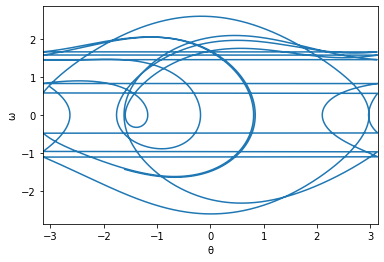

In [ ]:
#this script explores the damped-driven non-linear pendulum equation using the Runge-kutta method
#Solving the linear pendulum equation
import matplotlib.pylab as plt
import numpy as np
import math

#setting the value of k, phi and A to there respective numbers as mentioned in 9a
#the value of A was changed throughout this exercise according to the assignment
k=0.5
phi=0.66667
A=1.5

#defining the value of the gravitational constant and length of the string
L=1.0
g=1.0

#introducing a value named transient
transient=5000

#introducing equation 11 as instructed (4a)
#the sin (theta) was made into a theta as we are working with a linear pendulum
def f_nonlin(theta,omega,t):
  f=(-g/L)*(math.sin(theta))-(k*omega)+A*(math.cos(phi*t))
  return f

#initializing the values mentioned in 4c
theta=3.1
omega=0.0
t=0.0
dt=0.01

#creating lists to store values, that are going to be plotted later 
theta_list=[theta]
omega_list=[omega]
t_list=[t]

#introducing the parameter shift as mentioned in 9d
Q=0.0
#code for the Runge-Kutta method
for i in range (10000):
  k1a=dt*omega
  k1b=dt*f_nonlin(theta, omega, t)
  k2a=dt*(omega+k1b/2)
  k2b=dt*f_nonlin(theta+k1a/2, omega+k1b/2, t+dt/2)
  k3a=dt*(omega+k2b/2)
  k3b=dt*f_nonlin(theta+k2a/2, omega+k2b/2, t+dt/2)
  k4a=dt*(omega+k3b)
  k4b=dt*f_nonlin(theta+k3a, omega+k3b, t+dt)

  theta=theta+(k1a+2*k2a+2*k3a+k4a)/6
  omega=omega+(k1b+2*k2b+2*k3b+k4b)/6

  #restricting the range of theta from -pi to pi
  if theta<(Q-np.pi):
    theta=theta+2*np.pi
  if theta>(Q+np.pi):
    theta=theta-2*np.pi
  
  t=t+dt

  #updating the appropriate lists as the values are being determined in each iteration
  theta_list.append(theta)
  omega_list.append(omega)
  t_list.append(t)

#ploting theta and omega as a function of time
plt.plot(theta_list[transient:],omega_list[transient:])
plt.xlabel('θ')
plt.ylabel('ω')
plt.xlim([-np.pi+Q,np.pi+Q])
plt.show()